In [13]:
#importing basic python Libraries for data science work + networkX
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
%%time

#Importing the pre-processed clean data. Please change path to the file location of the file created by preprocessing

master_df = pd.read_csv('pre_processed_data.csv', low_memory = False)

Wall time: 20.7 s


In [4]:
master_df.head()

,Unnamed: 0,link_id,source_id,destination_id,route_direction,weekday,hour,rush_hour,winter,visibility_km,...,mean_temp_celcius,rain_mm,snow_cm,snow_on_ground_cm,wind_speed_kmh,wind_direction,weather_conditions,distance_m,speed_kmh,travel_time_sec
0,0,LSD_89-87,89,87,180,1,4,0,1,8.1,...,2.0,16.8,0.2,0.0,18.0,2.0,5,308,13.044706,85
1,1,LSD_89-87,89,87,180,1,4,0,1,8.1,...,2.0,16.8,0.2,0.0,18.0,2.0,5,308,20.160000,55
2,2,LSD_89-87,89,87,180,1,4,0,1,8.1,...,2.0,16.8,0.2,0.0,18.0,2.0,5,308,34.650000,32
3,3,LSD_89-87,89,87,180,1,4,0,1,8.1,...,2.0,16.8,0.2,0.0,18.0,2.0,5,308,15.616901,71
4,4,LSD_89-87,89,87,180,1,4,0,1,8.1,...,2.0,16.8,0.2,0.0,18.0,2.0,5,308,32.611765,34


In [5]:
#Drop unnnamed extra column that was created in the process
master_df.drop(['Unnamed: 0'], axis=1, inplace = True) 

In [6]:
master_df.describe().T

,count,mean,std,min,25%,50%,75%,max
route_direction,11151705.0,221.651483,98.404584,90.0,90.000000,270.00000,270.000000,360.000000
weekday,11151705.0,0.775585,0.417196,0.0,1.000000,1.00000,1.000000,1.000000
hour,11151705.0,12.590827,5.644988,0.0,8.000000,13.00000,17.000000,23.000000
rush_hour,11151705.0,0.466975,0.498908,0.0,0.000000,0.00000,1.000000,1.000000
winter,11151705.0,0.586970,0.492378,0.0,0.000000,1.00000,1.000000,1.000000
visibility_km,11151705.0,31.216201,14.288915,0.2,24.100000,24.10000,48.300000,48.300000
humidity_percentage,11151705.0,63.224512,18.977194,17.0,49.000000,63.00000,79.000000,97.000000
mean_temp_celcius,11151705.0,5.321145,12.306332,-23.0,-3.900000,5.80000,15.200000,30.500000
rain_mm,11151705.0,2.325211,5.277094,0.0,0.000000,0.00000,1.600000,31.000000
snow_cm,11151705.0,0.702051,2.704723,0.0,0.000000,0.00000,0.000000,20.600000


## Preliminary Network Analysis for our future work

In [7]:
#making a copy
nx_df = master_df.copy()

In [8]:
#Creating a tuple of lists for our edges (source, destination, weight)
source = nx_df['source_id'].astype('str')
destination = nx_df ['destination_id'].astype('str')
distance = nx_df ['distance_m'].astype(float)
weighted_edges =  list(zip(source, destination, distance))

In [9]:
#Creating a network with the weighted edges
road_map=nx.DiGraph()
road_map.add_weighted_edges_from(weighted_edges)

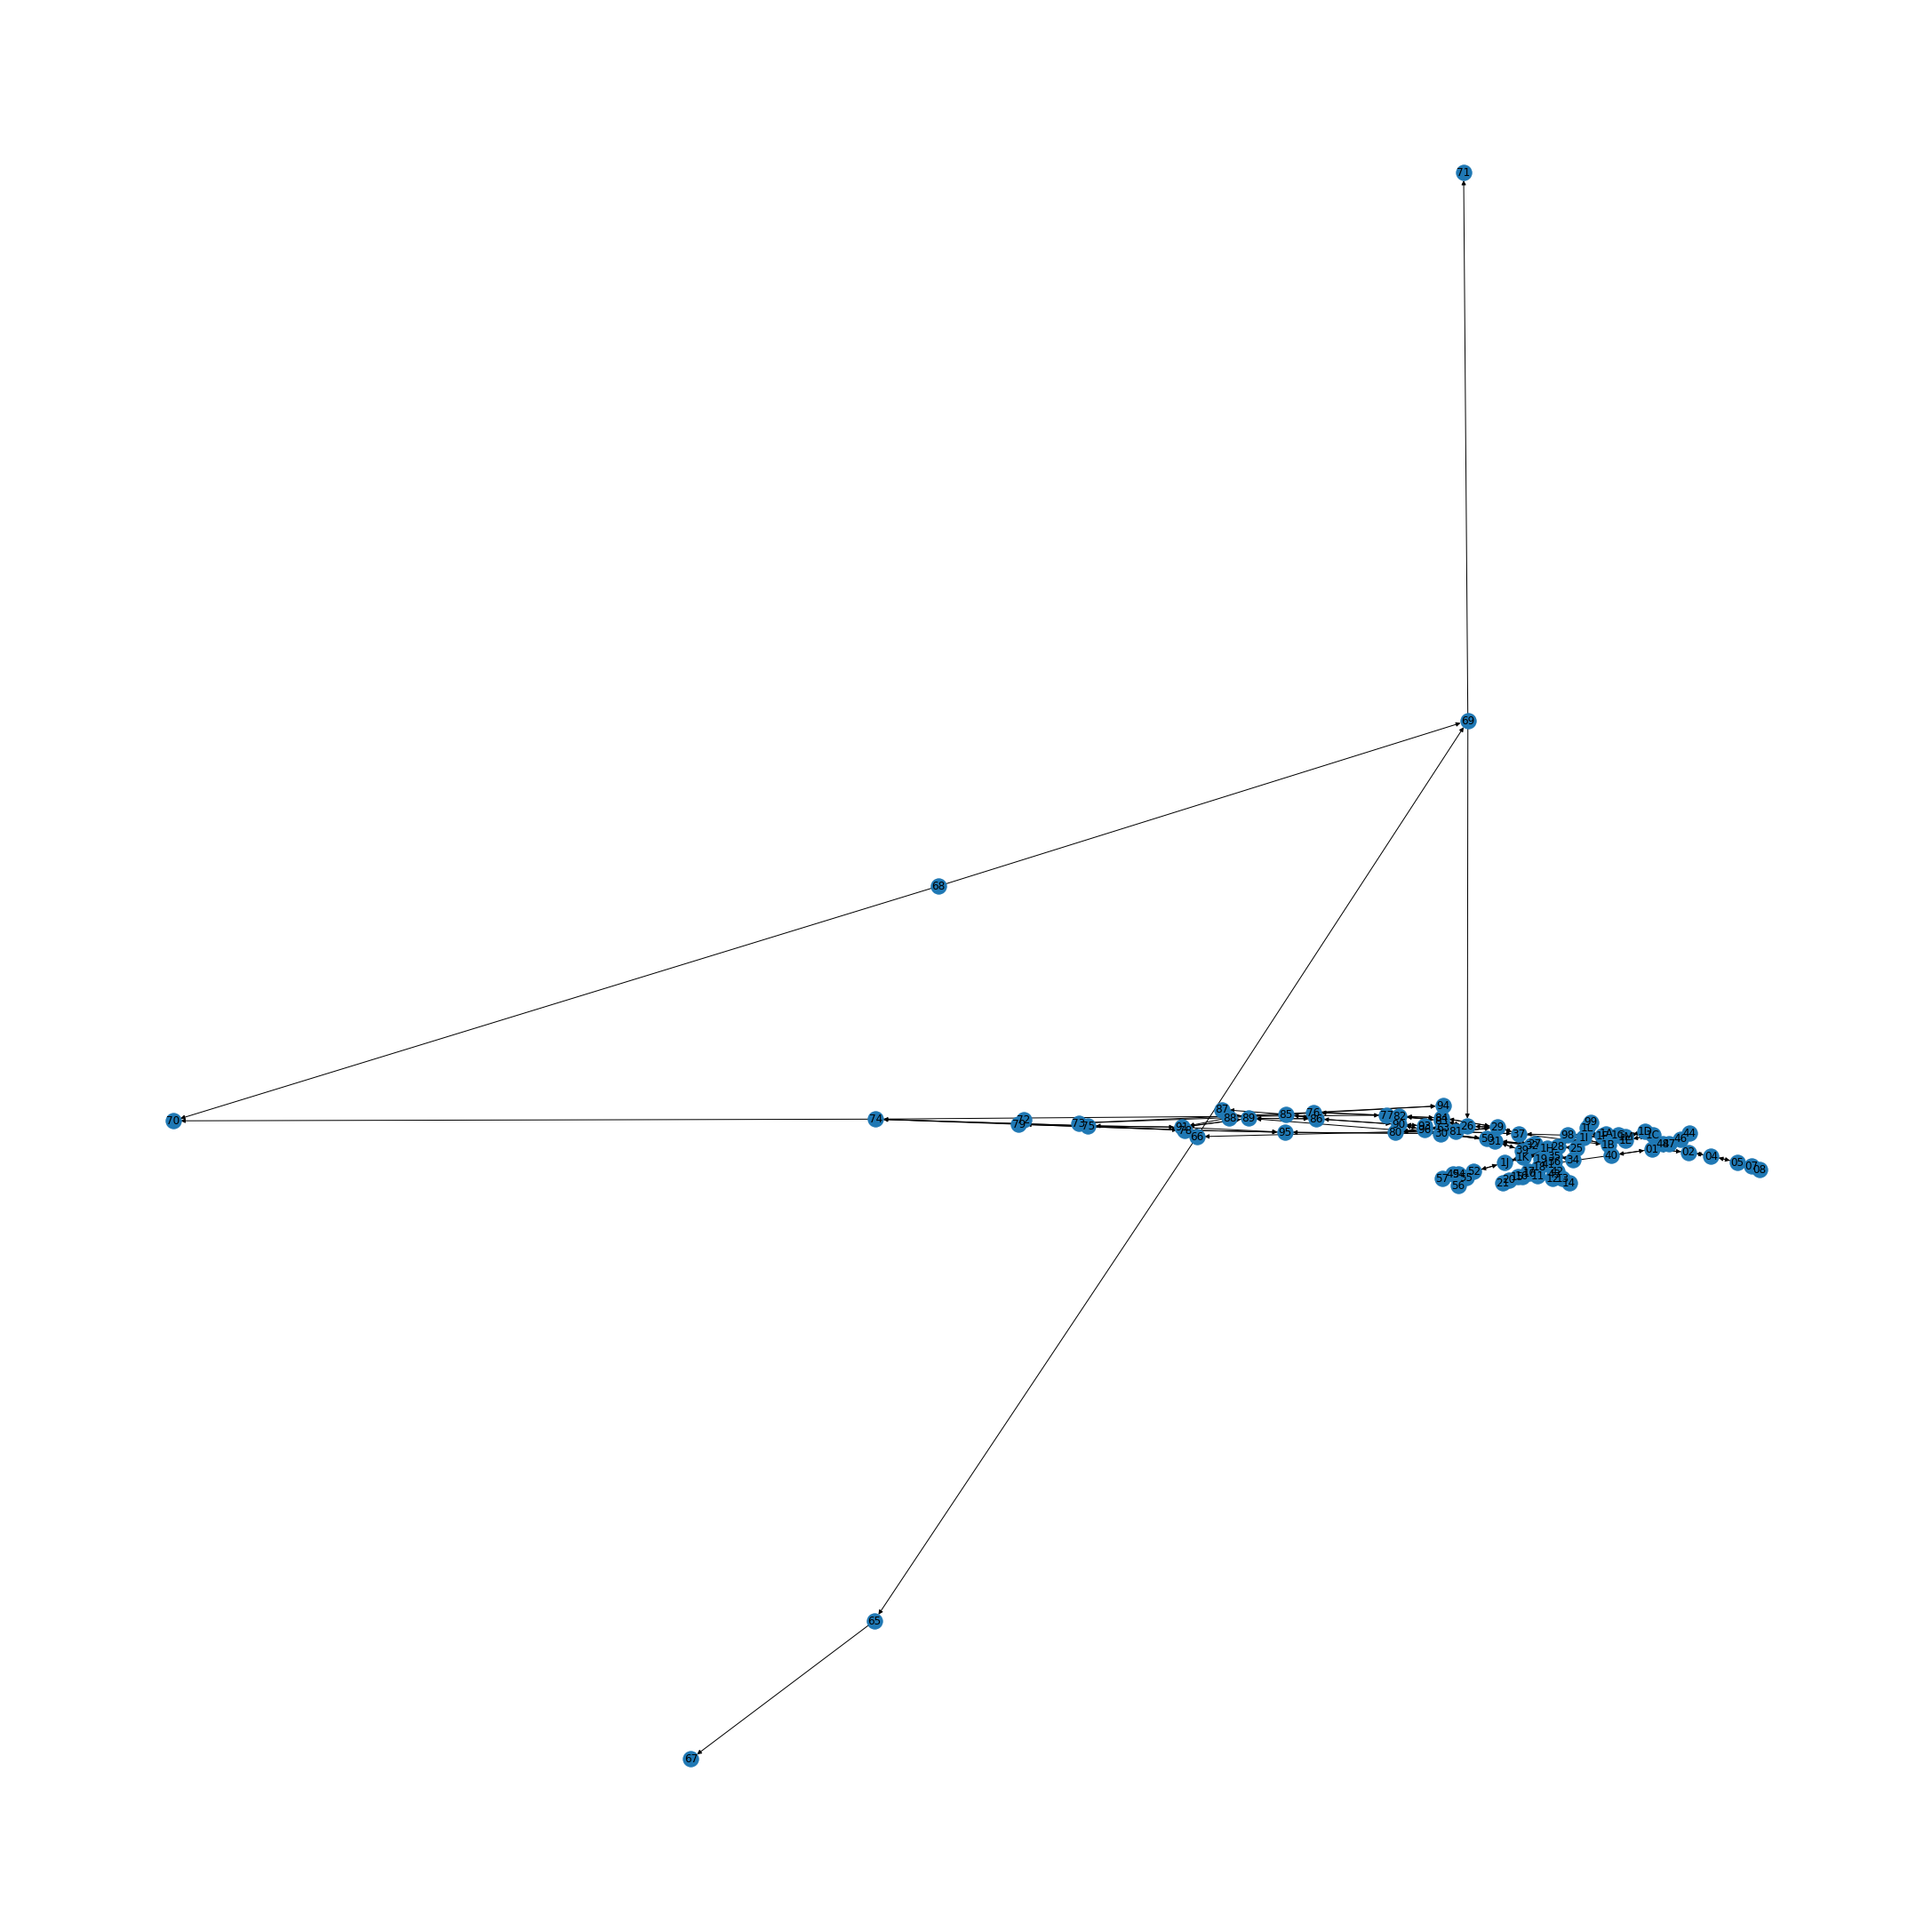

In [14]:
#Sketching the graph
plt.figure(figsize=(30,30))
nx.draw(road_map, with_labels=True)

### Testing Graph and Networkx Modules

In [15]:
print(nx.shortest_path(road_map, '74' , '98'))

['74', '77', '83', '26', '29', '37', '1B', '98']


In [16]:
#Checking if it gives right count of edges where segment is longer than 1.25 km. (75th percentile). Should be around 54
longest = [(u, v) for (u, v, d) in road_map.edges(data=True) if d['weight'] > 1250]
len(longest)

#Works

52

In [17]:
#testing if weights are rightly assigned. 
road_map.get_edge_data('89','87')

#Rightly so! 

{'weight': 308.0}

Please note the Network Analysis segment is still under work and can be considered merely a proof of concept. No meaningful work has been extracted out of it yet. 

## Fin.